In [43]:
#Import modules
import pyspore_utils as utils
import seaborn as sns
import cv2, os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Code is to try to come up with a good spore splitting regime. Have functions to find clumps easily. Going to try to use the hough ellipse transform to detect ellipses. Need to do this just for the frames leaading up to outgrowth. 

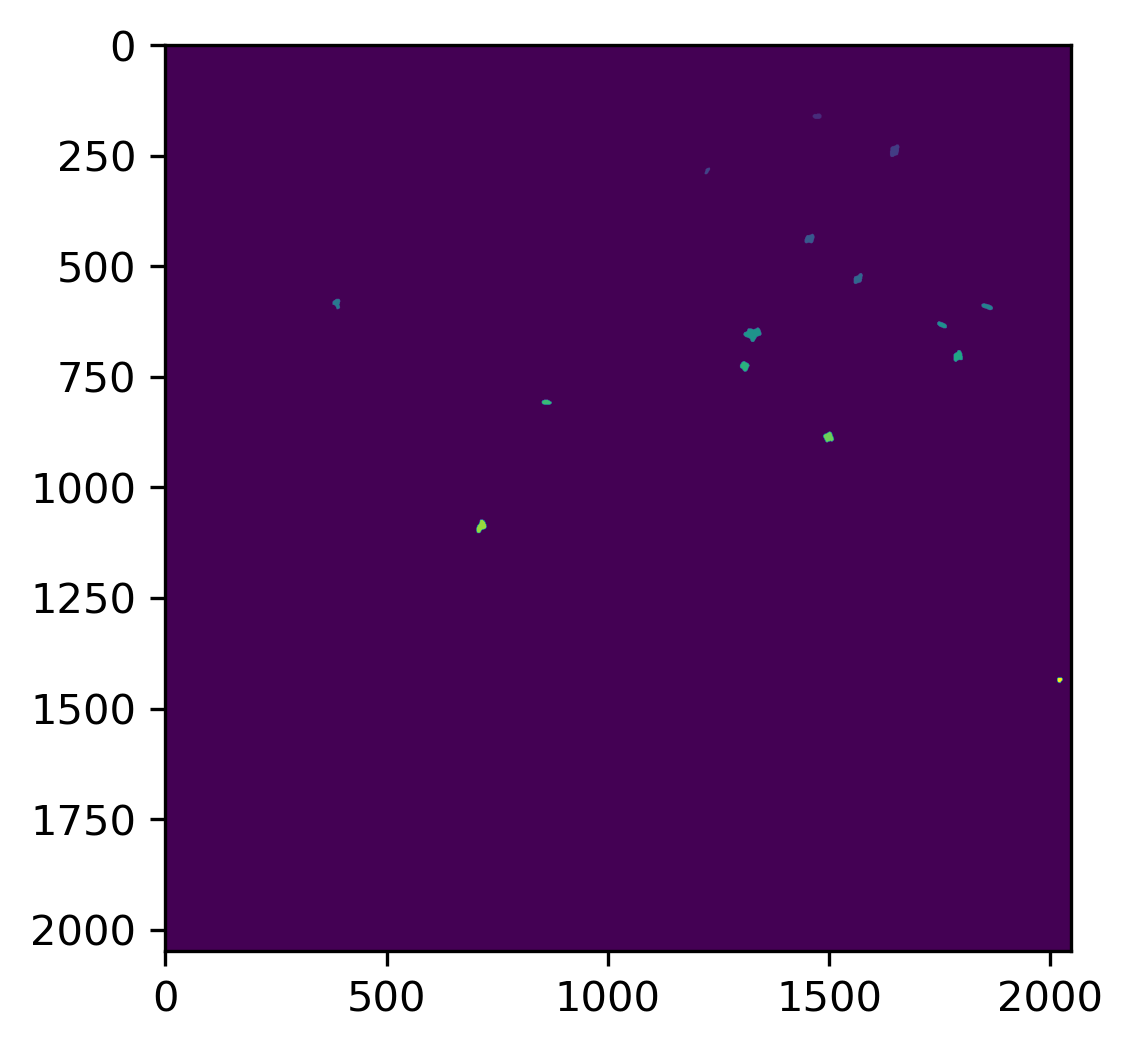

In [44]:
#import one of the pickle files containing labeled masks 
pkl_path = 'C:/Users/shenlab/Dropbox/P2P_2022/011222_p2p_germination/Ser22C0-TileScan_1_output.pkl'

#instantiate datahandling object
dh = utils.DataHandling()
data = dh.read_pkl(pkl_path)

#load a single mask with clumps to work with
mask = data['masks'][0,:,:].astype(np.uint8)

#get contours from mask
contours,_ = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

plt.rcParams['figure.dpi'] = 300
plt.imshow(mask)

In [45]:
#Old clump identificiation function

def find_clumps(contours, mask, area_thresh=300):
    #this clump finding algorithm is working well

    clumps_bbox = []
    clump_masks = []
    clump_contours = []
    # area threshold is in microns!

    for contour in contours:

        area = cv2.contourArea(contour)

        if area >= area_thresh:
            bbox = cv2.boundingRect(contour)
            x = bbox[0]
            y = bbox[1]
            w = bbox[2]
            h = bbox[3]

            # crop the mask with the bounding gbox of the clump. Can only feed an image with a single connected component
            crop_mask = mask[y: y + h, x: x + w]

            # populate lists
            clump_masks.append(crop_mask)
            clumps_bbox.append(bbox)
            clump_contours.append(contour)

        else:
            continue
            # find mean spore area here as well?
    return clumps_bbox, clump_masks, clump_contours

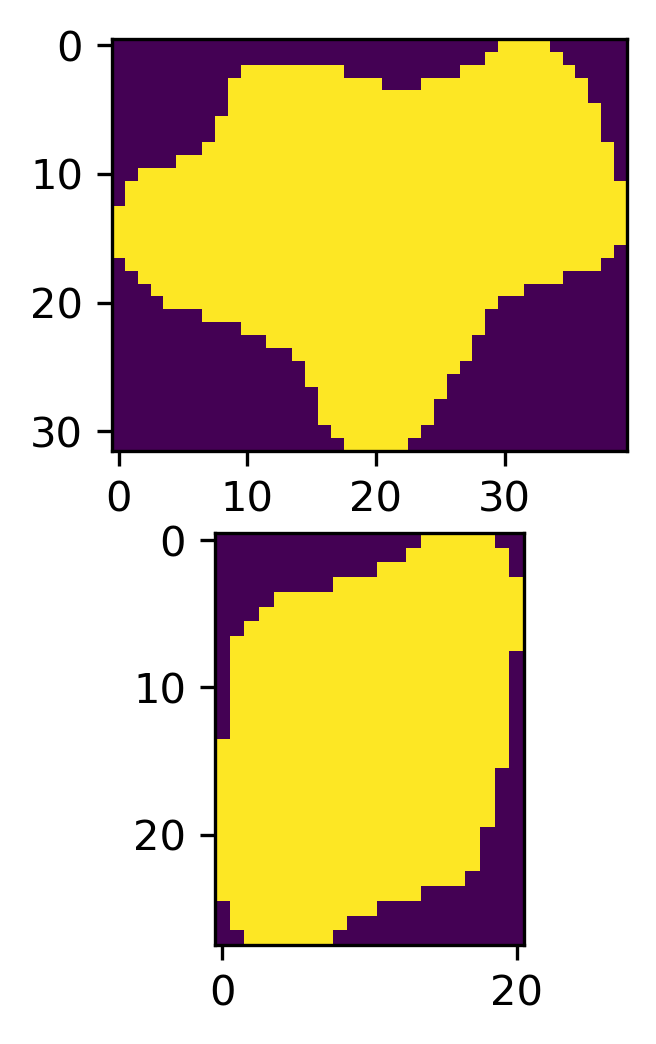

In [46]:
#Extract clumps
clumps_bbox, clump_masks, clump_contours = find_clumps(contours, mask, area_thresh=400)

#display all idenitfied clumps
fig, axs = plt.subplots(len(clump_masks),1, facecolor='w', edgecolor='k')

for i,clump in enumerate(clump_masks):
   axs[i].imshow(clump)

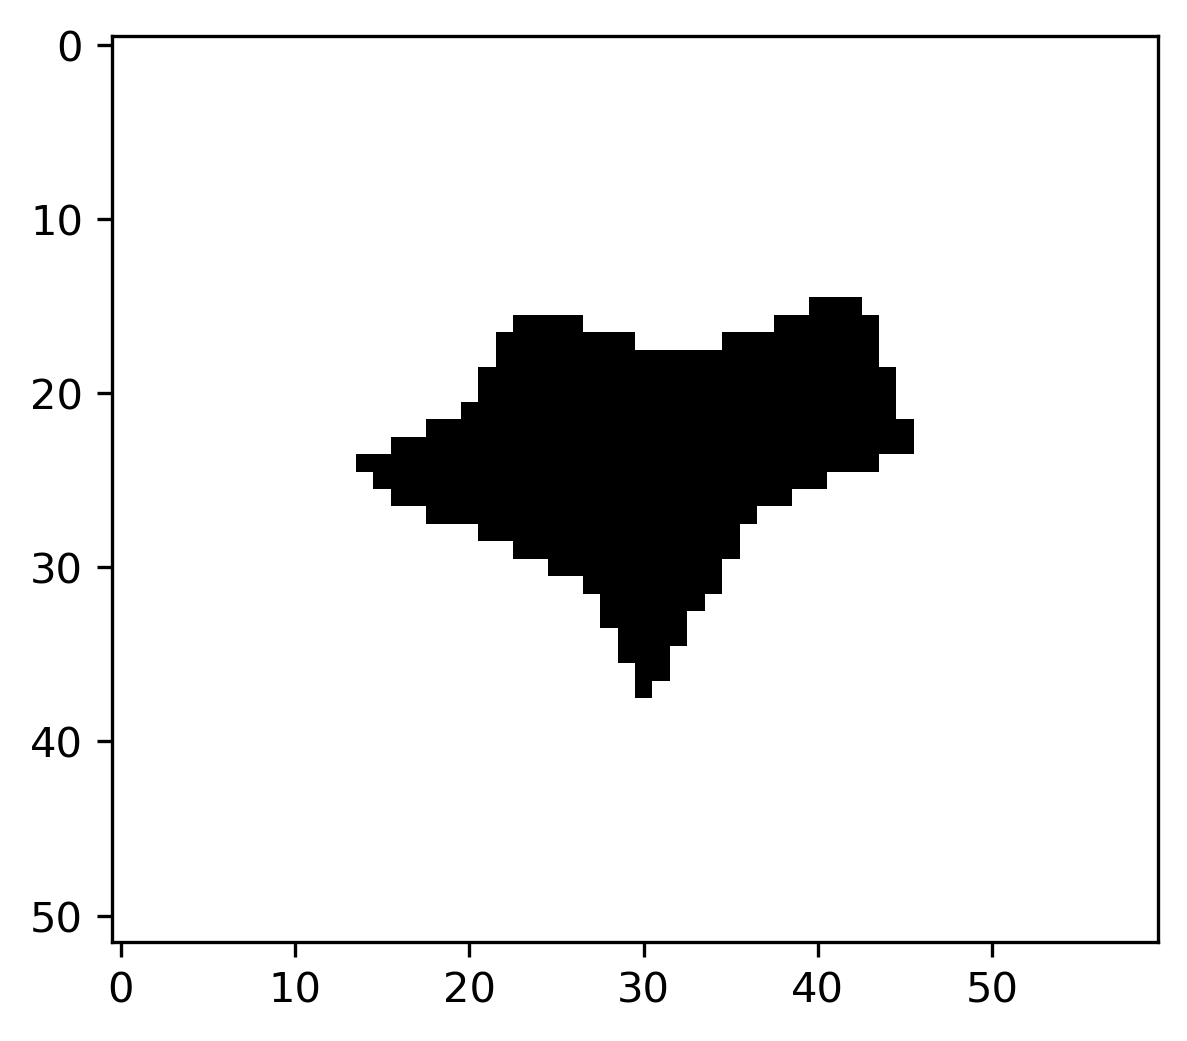

In [72]:
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
from skimage import data, color, img_as_ubyte

ellipses = cv2.imread('C:/Users/shenlab/Dropbox/Shen_lab_Cdiff/single-spore_germination/Python Spore Tracking App/test_images/test_ellipse_ims.tif')
test = cv2.cvtColor(ellipses, cv2.COLOR_BGR2GRAY)

clump = np.pad(clump_masks[0],10)
#try openCV distance transform
dist = cv2.distanceTransform(clump, cv2.DIST_L2, 3)
dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
_, seed_im = cv2.threshold(dist, 0.4, 1.0, cv2.THRESH_BINARY)
plt.imshow(seed_im, cmap = 'Greys')
# mask = np.pad(test, 20)
# plt.imshow(mask)

# clump_contour,_ = cv2.findContours(test,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

# clump_padded = np.zeros(test.shape).astype(np.uint8)


# #clump_padded[clump_padded[clump_contour]] = 255
# #clump_padded = color.gray2rgb(img_as_ubyte(clump_padded))

# clump_padded = cv2.drawContours(clump_padded, clump_contour,0,(255),1)

# #run hough transform to find ellipses in the image
# hough = hough_ellipse(clump_padded, accuracy = 32, threshold = 200)
# hough.sort(order='orientation')
# #need to remove repeated values yc and xc are identical and only keep the one with the highest accumulator value
# hough = hough[::-1]
# hough = hough[:5]
# print(hough)

# cy = []
# cx = []

# for i,ellipse in enumerate(hough):
#     yc =  np.int32(np.round(ellipse['yc']))
#     xc = np.int32(np.round(ellipse['xc']))
#     a = np.int32(np.round(ellipse['a']))
#     b = np.int32(np.round(ellipse['b']))

#     orientation = ellipse['orientation']
#     y, x = ellipse_perimeter(yc, xc, a, b, orientation)
#     cy.append(y)
#     cx.append(x)
   


# clump_padded = color.gray2rgb(img_as_ubyte(clump_padded))
# for i, j in zip(cy,cx):
#     clump_padded[i, j] = (0,255,0)
   
# #clump_padded[cy[1], cx[1]] = (0,255,0)
# plt.imshow(clump_padded)